<div style="font-size:18pt; padding-top:20px; text-align:center"><b>K-Means clustering</b></div><hr>

### Theoretical background (transfer into README)

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

### 1. Variants of the task

To discover your variant, enter your surname into corresponding variable (surname). Then run the cell:

In [1]:
surname = "Kolesnikov"

alp = 'abcdefghijklmnopqrstqvwxyz'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 1 + 1
print("Your variant - ", variant)

### 2. Assignment

<p><b>2.1 Assignment 1</b></p>

<ol>
    <li>Load raw data - file <b>"Cluster_A8_T1.csv";</b></li>
    <li>Plot graphs X1-X2, X1-X3, X2-X3;</li>
    <li>Plot graphs X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - true clusters);</li>
    <li>Perform clustering by <b>K-Means</b> and plot two graphs NInit-ARS for <i>init='random'</i> and <i>init='k-means++'</i>, where:
    <ul>
        <li><i>NInit</i> - repeats amount of K-Means algorithm - from 1 to 40;
        <li><i>ARS (adjusted_rand_score)</i> - clustering error;
        <li>parameters K-Means: <i>n_clusters=5</i>, <i>max_iter=300</i>, <i>init="random"</i>, <i>n_init=i</i>.
    </ul>
    <li>Repeat step 4 several times;</li>
    <li>Make some conclutions on the results.</li>
</ol>

<b>2.2 Working process</b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
df_data = pd.read_csv('./data/Cluster_A8_T1.csv')
df_data

,X1,X2,X3,Y
0,0.396845,1.463098,-2.529556,1
1,-1.584280,-2.366886,1.562455,4
2,2.164778,2.075564,3.036170,0
3,-0.831406,-3.857093,2.808180,4
4,1.847920,1.817510,-2.712600,1
...,...,...,...,...
495,2.655700,2.162434,-2.146997,1
496,-0.927534,-0.952582,2.033444,4
497,-2.935225,-1.622308,1.842163,4
498,1.141478,0.810346,2.947256,0


2. Plotting graphs X1-X2, X1-X3, X2-X3

In [4]:
x1 = df_data['X1']
x2 = df_data['X2']
x3 = df_data['X3']
y = df_data['Y']

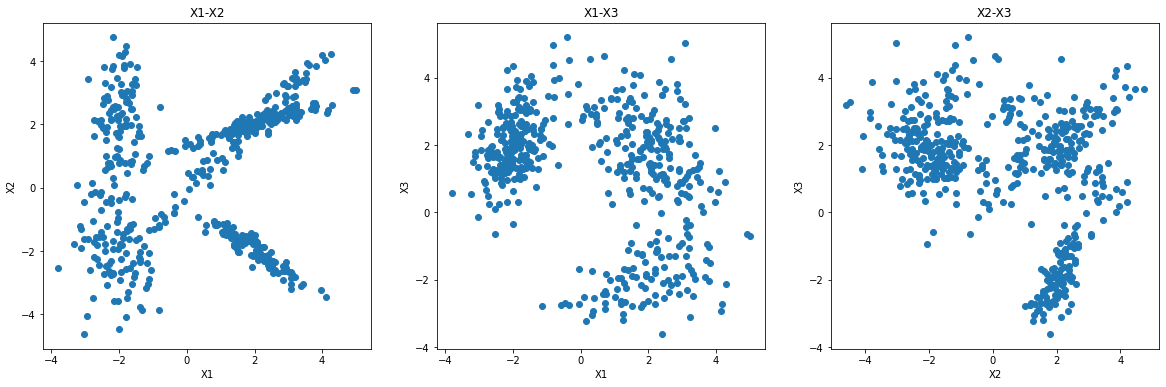

In [5]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2)

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3)

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3)

3. Plotting graphs X1-X2-Y, X1-X3-Y, X2-X3-Y (Y - real clusters)

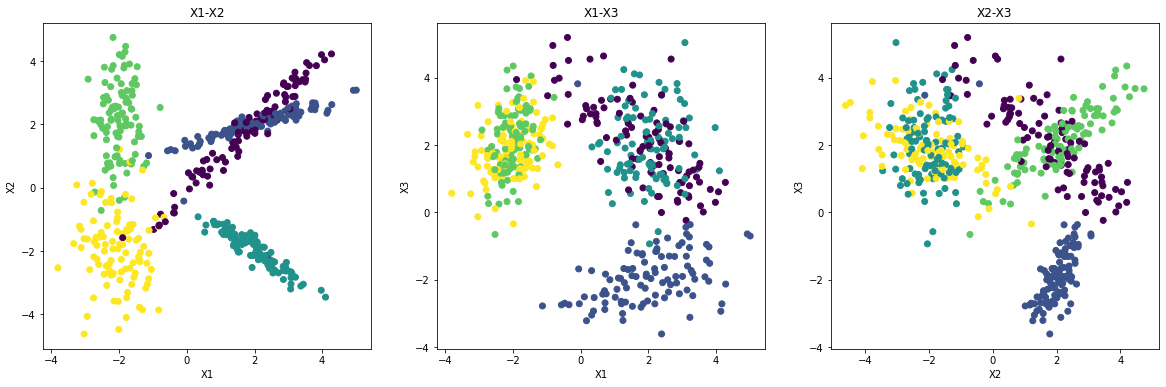

In [6]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2, c=y)

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3, c=y)

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3, c=y)

<li>4. Performing clustering by <b>K-Means</b> and plotting two graphs NInit-ARS for <i>init='random'</i> and <i>init='k-means++'</i>, where:
    <ul>
        <li><i>NInit</i> - repeats amount of K-Means algorithm - from 1 to 40;
        <li><i>ARS (adjusted_rand_score)</i> - clustering error;
        <li>parameters K-Means: <i>n_clusters=5</i>, <i>max_iter=300</i>, <i>init="random"</i>, <i>n_init=i</i>.
    </ul>
5. Repeating step 4 several times;

In [7]:
df_train = df_data[['X1','X2','X3']]
df_train

,X1,X2,X3
0,0.396845,1.463098,-2.529556
1,-1.584280,-2.366886,1.562455
2,2.164778,2.075564,3.036170
3,-0.831406,-3.857093,2.808180
4,1.847920,1.817510,-2.712600
...,...,...,...
495,2.655700,2.162434,-2.146997
496,-0.927534,-0.952582,2.033444
497,-2.935225,-1.622308,1.842163
498,1.141478,0.810346,2.947256


Performing clustering

In [8]:
repeat_count = 5

ninit_ars_rand = [{} for _ in range(repeat_count)]
ninit_ars_kmeans = [{} for _ in range(repeat_count)]

# Repeating 'repeat_count' times
for i in range(repeat_count):
    for j in range(1,41):

        # Fitting model for init='random'
        model_rand = KMeans(n_clusters=5, max_iter=300,init='random',n_init=j).fit(df_train)
        ninit_ars_rand[i].update({j:adjusted_rand_score(y, model_rand.labels_)})

        # Fitting model for init='k-means++'
        model_kmeans = KMeans(n_clusters=5, max_iter=300,init='k-means++',n_init=j).fit(df_train)
        ninit_ars_kmeans[i].update({j:adjusted_rand_score(y, model_kmeans.labels_)})   

Plotting graphs NInit-ARS

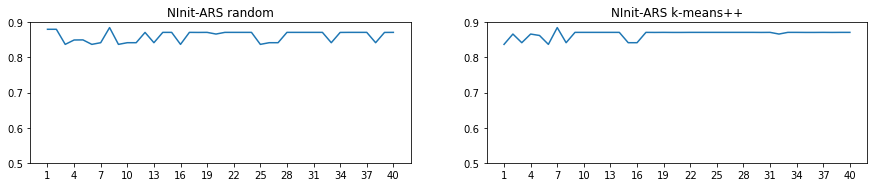

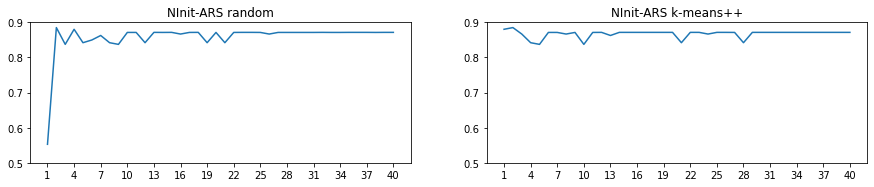

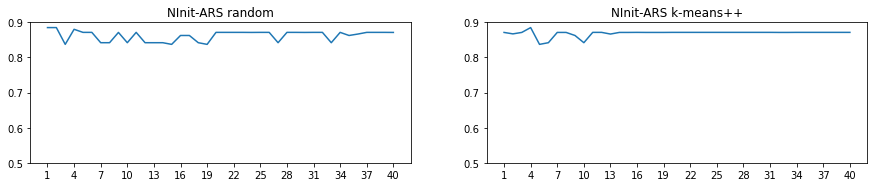

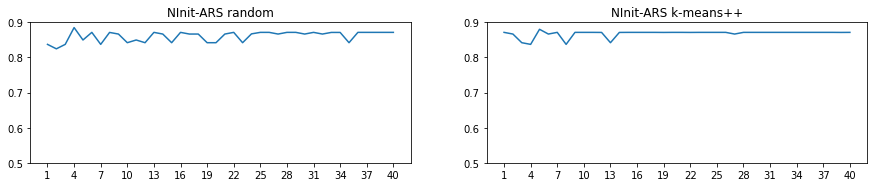

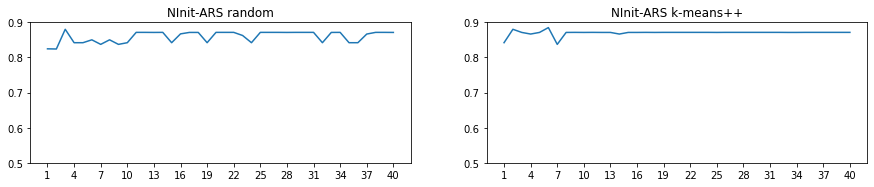

In [9]:
for i in range(repeat_count):
    plt.figure(figsize=[15,3*repeat_count])
    
    plt.subplot(repeat_count,2,2*i+1)
    plt.title('NInit-ARS random')
    plt.ylim([0.5,0.9])
    plt.xticks(range(1, 42, 3)) 
    plt.plot(list(ninit_ars_rand[i].keys()), list(ninit_ars_rand[i].values()))

    plt.subplot(repeat_count,2,2*i+2)
    plt.title('NInit-ARS k-means++')
    plt.ylim([0.5,0.9])
    plt.xticks(range(1, 42, 3)) 
    plt.plot(list(ninit_ars_kmeans[i].keys()), list(ninit_ars_kmeans[i].values()))

6. Conclusions

A low value of the n_init parameter gives an almost random ARS value. This is because the cluster centers are randomly selected. Increasing the n_init parameter improves the clustering results. <br>
The k-means++ modification allows us to get the desired result with a lower n_init value.

<p><b>Задание 2</b></p>

<ol>
    <li>Load raw data - file <b>"Cluster_A8_T2.csv"</b></li>
    <li>Plot graphs X1-X2, X1-X3, X2-X3</li>
    <li>Perform clustering by <b>K-Means</b> and plot graph NCluster-Inertia for <i>init='random'</i> and <i>init='k-means++'</i>, where:
    <ul>
        <li>NClusters - clusters amount;<br></li>
        <li>Inertia - the sum of the distances of observations to their closest cluster centers;<br></li>
        <li>Parameters KMean: <i>n_clusters=i<i>, <i>max_iter=300</i>, <i>init='k-means++'</i>,<i>random_state=0</i>, <i>n_init=20</i>.</li>
    </ul>
    <li>Choose best clusters amount;</li>
    <li>Plot graphs X1-X2, X1-X3, X2-X3 и X1-X2-Y_pred, X1-X3-Y_pred, X2-X3-Y_pred (Y_pred - predicted clusters)</li>
</ol>

In [11]:
df_data = pd.read_csv('./data/Cluster_A8_T2.csv')
df_data

,X1,X2,X3
0,-3.208327,1.387375,4.072033
1,3.140555,3.144011,-1.053300
2,-1.263527,-1.061774,-3.744767
3,2.936125,1.577823,1.252174
4,-1.467342,-2.380948,2.174253
...,...,...,...
495,-1.377050,2.370779,1.500491
496,-0.035526,3.335350,2.807369
497,3.485987,3.492436,-0.930252
498,1.687437,1.193393,2.047389


In [12]:
x1 = df_data['X1']
x2 = df_data['X2']
x3 = df_data['X3']

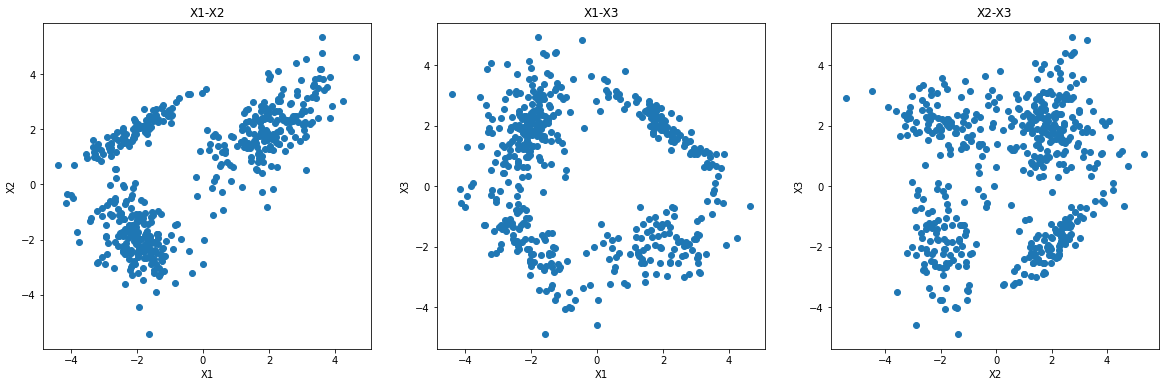

In [13]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2)

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3)

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3)

In [14]:
inertia = []

for i in range(1,41):

    # Fitting model for init='k-means++'
    model = KMeans(n_clusters=i, max_iter=300,init='k-means++', random_state=0, n_init=20).fit(df_train)
    inertia.append(model.inertia_)  

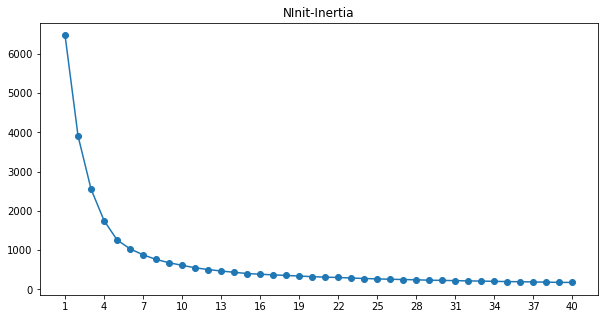

In [15]:
plt.figure(figsize=[10,5])
plt.title('NInit-Inertia')
plt.xticks(range(1, 42, 3)) 
plt.plot(range(1,41), inertia, '-o')

We can determine amount of clusters by elbow method - the optimal is 5

In [16]:
model = KMeans(n_clusters=5, max_iter=300,init='k-means++', random_state=0, n_init=20).fit(df_train)
x = df_data[['X1','X2','X3']]

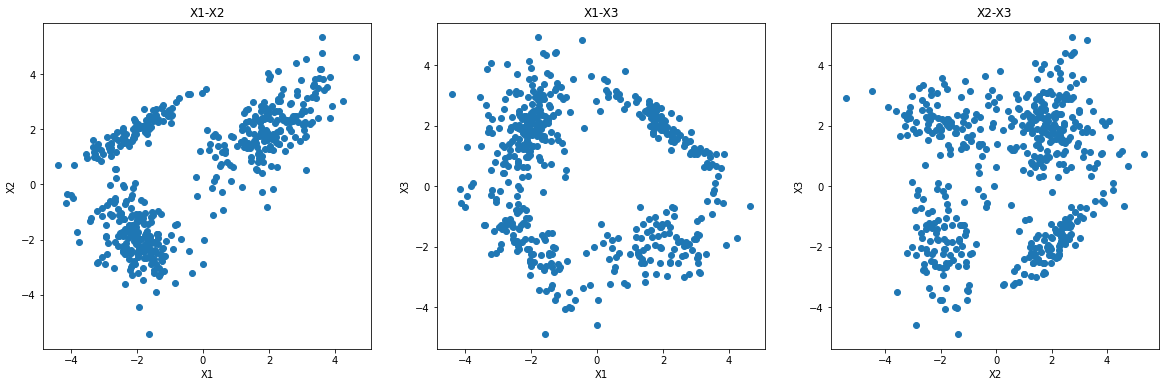

In [17]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2)

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3)

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3)

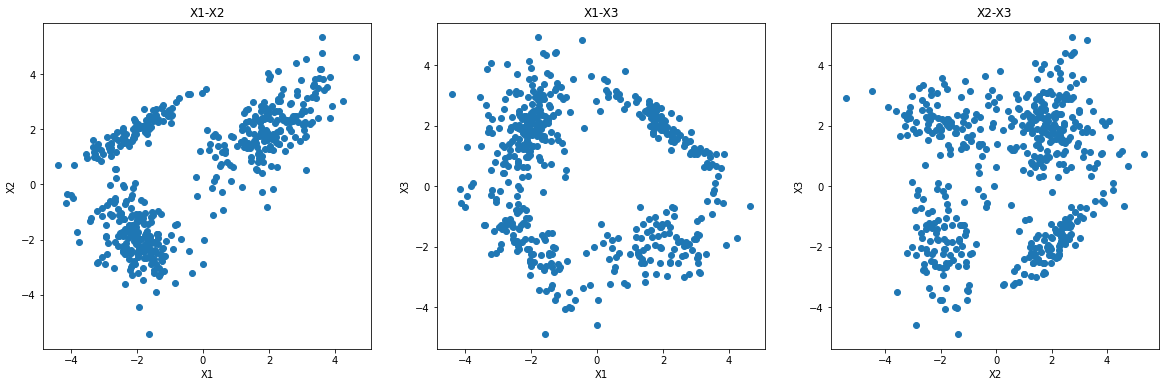

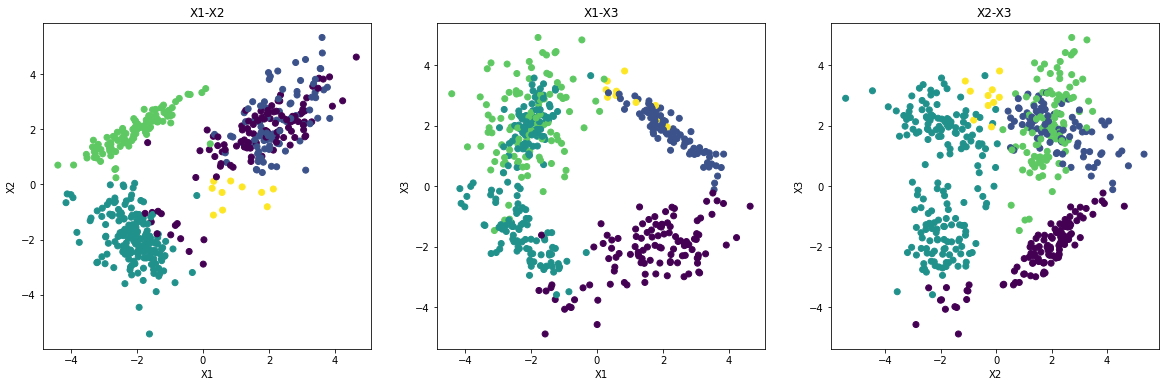

In [18]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2)

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3)

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3)

plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
plt.title('X1-X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1,x2, c=model.predict(x))

plt.subplot(1,3,2)
plt.title('X1-X3')
plt.xlabel('X1')
plt.ylabel('X3')
plt.scatter(x1,x3, c=model.predict(x))

plt.subplot(1,3,3)
plt.title('X2-X3')
plt.xlabel('X2')
plt.ylabel('X3')
plt.scatter(x2,x3, c=model.predict(x))